# Respostas

## Setup

### Definir imports

In [8]:
from datetime import date, datetime

from pandas import DataFrame, concat, date_range

from core.carteira import Carteira, Posicao
from core.var.var import VarParametrico, VarHistorico
from inputs.data_handler import InputsDataHandler
from core.fatores_risco.exposicao import ExposicaoCarteira
from core.fatores_risco.fatores_risco import MatrizFatoresRisco
from core.renda_fixa.renda_fixa import RendaFixa
from utils.enums import IntervaloConfianca, AcoesBr, AcoesUs, Opcoes, Futuros, Titulos, TipoVarHistorico, Colunas

### Instanciar gerenciador de inputs

In [2]:
data_handler = InputsDataHandler()

## Parte 1

### Definição da carteira do grupo

In [3]:
posicoes_canonicas = [
    Posicao(AcoesBr.EMBRAER, 1500, data_handler),
    Posicao(AcoesBr.CASAS_BAHIA, 24500, data_handler),
    Posicao(AcoesUs.FORD_MOTORS, 1700, data_handler),
    Posicao(Opcoes.OPCAO_9, 1.5, data_handler),
    Posicao(Futuros.FUTURO_15, 0.6, data_handler),
    Posicao(Futuros.FUTURO_9, 0.2, data_handler),
    Posicao(Futuros.FUTURO_25, 17, data_handler),
    Posicao(Titulos.TITULO_9, 25, data_handler)
]

In [4]:
carteira_canonica = Carteira(posicoes_canonicas, date(2025, 5, 26))

### a.

In [5]:
{
    p: [f.name for f in carteira_canonica.__getattribute__(p).fatores_risco]
    for p in carteira_canonica.__dict__
    if "POSICAO" in p
}

{'POSICAO_1': ['ACAO'],
 'POSICAO_2': ['ACAO'],
 'POSICAO_3': ['CAMBIO_USDBRL', 'ACAO'],
 'POSICAO_4': ['VOLATILIDADE', 'ACAO'],
 'POSICAO_5': ['ACAO'],
 'POSICAO_6': ['CAMBIO_USDOUTROS', 'CAMBIO_USDBRL'],
 'POSICAO_7': ['JUROS'],
 'POSICAO_8': ['CAMBIO_USDBRL', 'JUROS']}

### b.

In [6]:
fatores_risco = MatrizFatoresRisco(carteira_canonica, data_handler)

In [7]:
fatores_risco.matriz_cov_ewma()

c:\Users\u54323\OneDrive - Statkraft AS\Documents\Breno\FGV\Risco\trabalho_risco\core\renda_fixa\renda_fixa.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eh_feriado=lambda df: df["eh_feriado"].fillna(False).astype(bool),


ativo,CASAS_BAHIA,DI,EMBRAER,FORD_MOTORS,IBOV,IBOVE,IBOVE_VOL,TREASURY,USDBRL,USDCAD
ativo,,,,,,,,,,
CASAS_BAHIA,0.002933,0.000351,0.000174,0.000367,0.000135,0.000135,0.000087,0.000907,-0.000004,0.000025
DI,0.000351,0.014339,-0.000472,-0.000328,-0.000411,-0.000411,0.000017,0.002351,0.000141,0.000003
EMBRAER,0.000174,-0.000472,0.000440,0.000092,0.000100,0.000100,0.000007,0.000159,-0.000015,0.000015
FORD_MOTORS,0.000367,-0.000328,0.000092,0.000385,0.000098,0.000098,0.000025,0.000253,0.000014,-0.000002
IBOV,0.000135,-0.000411,0.000100,0.000098,0.000096,0.000096,0.000012,0.000029,-0.000020,-0.000006
IBOVE,0.000135,-0.000411,0.000100,0.000098,0.000096,0.000096,0.000012,0.000029,-0.000020,-0.000006
IBOVE_VOL,0.000087,0.000017,0.000007,0.000025,0.000012,0.000012,0.000054,0.000111,0.000005,0.000002
TREASURY,0.000907,0.002351,0.000159,0.000253,0.000029,0.000029,0.000111,0.004749,-0.000006,0.000053
USDBRL,-0.000004,0.000141,-0.000015,0.000014,-0.000020,-0.000020,0.000005,-0.000006,0.000064,-0.000001


### d.

In [8]:
calculadora_var_parametrico = VarParametrico(
    carteira_canonica,
    ExposicaoCarteira(carteira_canonica, data_handler),
    fatores_risco,
    IntervaloConfianca.P99
)

In [9]:
calculadora_var_parametrico.var_parametrico_posicao()

c:\Users\u54323\OneDrive - Statkraft AS\Documents\Breno\FGV\Risco\trabalho_risco\core\renda_fixa\renda_fixa.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eh_feriado=lambda df: df["eh_feriado"].fillna(False).astype(bool),
c:\Users\u54323\OneDrive - Statkraft AS\Documents\Breno\FGV\Risco\trabalho_risco\core\renda_fixa\renda_fixa.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eh_feriado=lambda df: df["eh_feriado"].fillna(False).astype(bool),


,EMBRAER,CASAS_BAHIA,FORD_MOTORS,IBOVE,IBOV,USDCAD,DI,TREASURY
0,4916.402256,12840.93821,5090.372614,2471.872287,1881.363971,1710.139296,473562.502766,331570.67561


### e.

In [10]:
calculadora_var_parametrico.var_parametrico_carteira()

c:\Users\u54323\OneDrive - Statkraft AS\Documents\Breno\FGV\Risco\trabalho_risco\core\renda_fixa\renda_fixa.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eh_feriado=lambda df: df["eh_feriado"].fillna(False).astype(bool),
c:\Users\u54323\OneDrive - Statkraft AS\Documents\Breno\FGV\Risco\trabalho_risco\core\renda_fixa\renda_fixa.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eh_feriado=lambda df: df["eh_feriado"].fillna(False).astype(bool),


656183.5036821351

### h.

In [11]:
calculadora_var_parametrico.participacao_percentual_posicoes()

c:\Users\u54323\OneDrive - Statkraft AS\Documents\Breno\FGV\Risco\trabalho_risco\core\renda_fixa\renda_fixa.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eh_feriado=lambda df: df["eh_feriado"].fillna(False).astype(bool),
c:\Users\u54323\OneDrive - Statkraft AS\Documents\Breno\FGV\Risco\trabalho_risco\core\renda_fixa\renda_fixa.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eh_feriado=lambda df: df["eh_feriado"].fillna(False).astype(bool),
c:\Users\u54323\OneDrive - Statkraft AS\Documents\Breno\FGV\Risco\trabalho_risco\core\renda_fixa\renda_f

,EMBRAER,CASAS_BAHIA,FORD_MOTORS,IBOVE,IBOV,USDCAD,DI,TREASURY
0,0.000525,0.00362,0.000582,0.00092,0.000654,0.0005,0.625849,0.36735


### i.

In [12]:
lista_var = []
for posicao in posicoes_canonicas:
    nome_posicao = posicao.ativo.name if isinstance(posicao.ativo, (AcoesBr, AcoesUs)) else posicao.produto.name

    print(f" Calculando VaR hisórico para a posição {nome_posicao}...")

    carteira_simples = Carteira([posicao], carteira_canonica.data_referencia)
    calculadora_var_historico_posicao = VarHistorico(
        carteira_simples,
        MatrizFatoresRisco(carteira_simples, data_handler),
        data_handler
    )

    var_historico = DataFrame({nome_posicao: [calculadora_var_historico_posicao.var_historico_carteira(
        500,
        IntervaloConfianca.P99
    )]})

    lista_var.append(var_historico)

concat(lista_var, axis=1)

 Calculando VaR hisórico para a posição EMBRAER...
 Calculando VaR hisórico para a posição CASAS_BAHIA...
 Calculando VaR hisórico para a posição FORD_MOTORS...
 Calculando VaR hisórico para a posição IBOVE...


c:\Users\u54323\OneDrive - Statkraft AS\Documents\Breno\FGV\Risco\trabalho_risco\core\renda_fixa\renda_fixa.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eh_feriado=lambda df: df["eh_feriado"].fillna(False).astype(bool),


 Calculando VaR hisórico para a posição IBOV...
 Calculando VaR hisórico para a posição USDCAD...
 Calculando VaR hisórico para a posição DI...


c:\Users\u54323\OneDrive - Statkraft AS\Documents\Breno\FGV\Risco\trabalho_risco\core\renda_fixa\renda_fixa.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eh_feriado=lambda df: df["eh_feriado"].fillna(False).astype(bool),


 Calculando VaR hisórico para a posição TREASURY...


,EMBRAER,CASAS_BAHIA,FORD_MOTORS,IBOVE,IBOV,USDCAD,DI,TREASURY
0,5387.74611,13498.615067,6184.103354,7850.924267,1734.965329,754.120856,5593.588908,2629.2068


### j.

In [13]:
calculadora_var_historico = VarHistorico(
    carteira_canonica,
    fatores_risco,
    data_handler
)

In [ ]:
calculadora_var_historico.var_historico_carteira(
    500,
    IntervaloConfianca.P99
)

### k.

In [ ]:
calculadora_var_historico_boudoukh = VarHistorico(
    carteira_canonica,
    fatores_risco,
    data_handler,
    TipoVarHistorico.BOUDOUKH
)

calculadora_var_historico_boudoukh.var_historico_carteira(
    500,
    IntervaloConfianca.P99
)

### l.

In [15]:
calculadora_var_historico.estresse_carteira(1500)

c:\Users\u54323\OneDrive - Statkraft AS\Documents\Breno\FGV\Risco\trabalho_risco\core\renda_fixa\renda_fixa.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eh_feriado=lambda df: df["eh_feriado"].fillna(False).astype(bool),
c:\Users\u54323\OneDrive - Statkraft AS\Documents\Breno\FGV\Risco\trabalho_risco\core\renda_fixa\renda_fixa.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eh_feriado=lambda df: df["eh_feriado"].fillna(False).astype(bool),


57297.57531860052

### m.

In [ ]:
calculadora_var_historico_tve = VarHistorico(
    carteira_canonica,
    MatrizFatoresRisco(carteira_canonica, data_handler),
    data_handler,
    TipoVarHistorico.TVE_POT
)

In [ ]:
var_tve = calculadora_var_historico_tve.var_historico_carteira(1500, IntervaloConfianca.P99)

In [ ]:
var_tve

### n.

In [ ]:
calculadora_var_historico_tve.perda_esperada(var_tve)

## Parte 2

### Selecionar posições de ações

In [3]:
posicoes_acoes = [
    Posicao(AcoesBr.EMBRAER, 1500, data_handler),
    Posicao(AcoesBr.CASAS_BAHIA, 24500, data_handler),
    Posicao(AcoesUs.FORD_MOTORS, 1700, data_handler)
]

### Definir intervalo de análise
28/05/2024 até 26/05/2025

In [4]:
intervalo_datas_pd = date_range(
    start=datetime(2024, 5, 28),
    end=datetime(2025, 5, 26)
)
intervalo_datas = [d.date() for d in intervalo_datas_pd]

### o.

AVISO: ESTA ROTINA DEMORA POR VOLTA DE 20 MINUTOS

In [ ]:
lista_var_diario = []
lista_var_hw = []
total_dias = len(intervalo_datas)
passo_aviso = total_dias // 3
for n, dia in enumerate(intervalo_datas):
    diff = total_dias - n
    if (diff in [passo_aviso, 2 * passo_aviso]) or (n == 0) or (diff == 1):
        print(f" Calculando VaR diário para {diff} dias restantes...")

    carteira_diaria = Carteira(posicoes_acoes, dia)

    # VaR histórico simples
    calculadora_var_historico_diario = VarHistorico(
        carteira_diaria,
        MatrizFatoresRisco(carteira_diaria, data_handler),
        data_handler,
        TipoVarHistorico.SIMPLES
    )

    # VaR histórico Hull White
    calculadora_var_historico_hw = VarHistorico(
        carteira_diaria,
        MatrizFatoresRisco(carteira_diaria, data_handler),
        data_handler,
        TipoVarHistorico.HULL_WHITE
    )

    var_diario = DataFrame({
        "data": [dia],
        "var_diario": [-calculadora_var_historico_diario.var_historico_carteira(
            500,
            IntervaloConfianca.P99
        )]
    })

    var_diario_hw = DataFrame({
        "data": [dia],
        "var_diario_hw": [-calculadora_var_historico_hw.var_historico_carteira(
            500,
            IntervaloConfianca.P99
        )]
    })

    lista_var_diario.append(var_diario)
    lista_var_hw.append(var_diario_hw)

var_diario_df = concat(lista_var_diario, ignore_index=True)
var_diario_hw_df = concat(lista_var_hw, ignore_index=True)

 Calculando VaR diário para 364 dias restantes...
 Calculando VaR diário para 242 dias restantes...
 Calculando VaR diário para 121 dias restantes...
 Calculando VaR diário para 1 dias restantes...


,data,var_diario
0,2024-05-28,24852.445399
1,2024-05-29,25289.235648
2,2024-05-30,25289.235648
3,2024-05-31,25410.322739
4,2024-06-01,25410.322739
...,...,...
359,2025-05-22,17346.849303
360,2025-05-23,16878.730151
361,2025-05-24,16878.730151
362,2025-05-25,16878.730151


In [ ]:
var_diario_df

<Axes: title={'center': 'VaR Diário da Carteira de Ações'}, xlabel='data'>

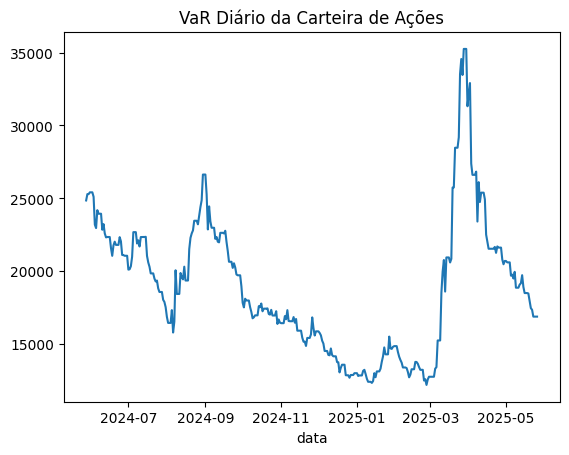

In [48]:
concat(lista_var_diario, ignore_index=True).set_index("data").var_diario.plot(
    title="VaR Diário da Carteira de Ações"
)

### p.

In [ ]:
var_diario_hw_df

### q.

In [6]:
# Utilizar framework de VaR histórico para produzir os cenários de P&L
carteira_acoes = Carteira(posicoes_acoes, date(2025, 5, 26))
calc_cenarios_historico = VarHistorico(
    carteira_acoes,
    MatrizFatoresRisco(carteira_acoes, data_handler),
    data_handler
)

In [7]:
cenarios_pnl = calc_cenarios_historico._gerar_cenarios(500)

In [12]:
serie_pnl = cenarios_pnl.loc[cenarios_pnl[Colunas.DATA.value].isin(intervalo_datas_pd)]\
                        .groupby(Colunas.DATA.value).sum()\
                        .reset_index()\
                        [[Colunas.DATA.value, Colunas.PNL.value]]

<Axes: title={'center': 'Série de P&L da Carteira de Ações'}, xlabel='data'>

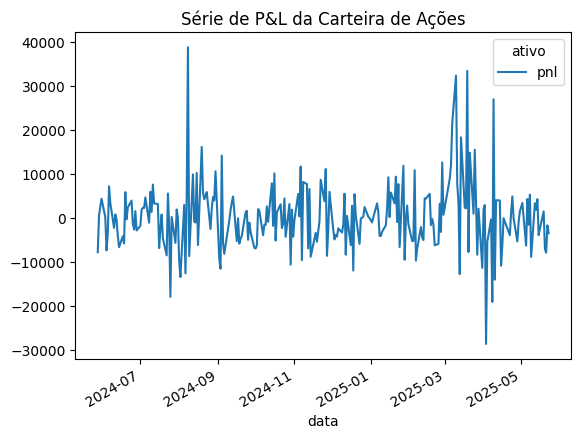

In [ ]:
series_temporais = serie_pnl.merge(var_diario_df, on=Colunas.DATA.value, how='left')\
                            .merge(var_diario_hw_df, on=Colunas.DATA.value, how='left')

In [ ]:
series_temporais.set_index(Colunas.DATA.value).plot(
    title="Séries Temporais de P&L, VaR Diário e VaR Hull White",
    figsize=(12, 6)
)

O modelo Hull-White performa melhor, pois considera a volatilidade como um parâmetro de ajuste no cálculo do VaR histórico. Dessa forma, o valor calculado é melhor ponderado dada a volatilidade do momento de análise, evitando superestimar resultados de períodos mais voláteis e vice-versa.

### r.